In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# weather.csv 파일을 읽어옵니다.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weather.csv')

# 데이터프레임의 상위 5개 행과 정보 확인
print("데이터프레임 상위 5행:")
print(df.head())
print("\n데이터프레임 정보:")
df.info()

데이터프레임 상위 5행:
        Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  11/1/2007  Canberra      8.0     24.3       0.0          3.4       6.3   
1  11/2/2007  Canberra     14.0     26.9       3.6          4.4       9.7   
2  11/3/2007  Canberra     13.7     23.4       3.6          5.8       3.3   
3  11/4/2007  Canberra     13.3     15.5      39.8          7.2       9.1   
4  11/5/2007  Canberra      7.6     16.1       2.8          5.6      10.6   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0          NW           30.0         SW  ...          29       1019.7   
1         ENE           39.0          E  ...          36       1012.4   
2          NW           85.0          N  ...          69       1009.5   
3          NW           54.0        WNW  ...          56       1005.5   
4         SSE           50.0        SSE  ...          49       1018.3   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       

In [2]:
# 모델 훈련에 필요한 주요 열의 결측치를 제거합니다.
df = df.dropna(subset=['RISK_MM', 'MinTemp', 'MaxTemp', 'WindGustDir', 'Evaporation', 'Sunshine', 'Rainfall', 'Cloud3pm'])

# 예측 목표(target)인 'RISK_MM'을 제외하고 특성(features)을 선택합니다.
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
        'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
        'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
y = df['RISK_MM']

# 'Location'과 'WindGustDir' 같은 범주형(문자열) 데이터를 원-핫 인코딩으로 변환합니다.
X_encoded = pd.get_dummies(X, drop_first=True)

print("전처리 후 특성 데이터(X_encoded) 정보:")
X_encoded.info()

전처리 후 특성 데이터(X_encoded) 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 0 to 365
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        360 non-null    float64
 1   MaxTemp        360 non-null    float64
 2   Rainfall       360 non-null    float64
 3   Evaporation    360 non-null    float64
 4   Sunshine       360 non-null    float64
 5   WindGustSpeed  360 non-null    float64
 6   WindSpeed9am   353 non-null    float64
 7   WindSpeed3pm   360 non-null    int64  
 8   Humidity9am    360 non-null    int64  
 9   Humidity3pm    360 non-null    int64  
 10  Pressure9am    360 non-null    float64
 11  Pressure3pm    360 non-null    float64
 12  Cloud9am       360 non-null    int64  
 13  Cloud3pm       360 non-null    int64  
 14  Temp9am        360 non-null    float64
 15  Temp3pm        360 non-null    float64
dtypes: float64(11), int64(5)
memory usage: 47.8 KB


In [4]:
# 'WindSpeed9am' 열의 결측치를 평균값으로 대체합니다.
X_encoded['WindSpeed9am'].fillna(X_encoded['WindSpeed9am'].mean(), inplace=True)

# 데이터를 훈련 세트와 테스트 세트로 8:2 비율로 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# KNN을 위한 데이터 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN 모델을 생성하고 훈련 데이터로 학습시킵니다.
# n_neighbors는 고려할 이웃의 수를 의미합니다. 여기서는 5로 설정했습니다.
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# 스케일링된 테스트 데이터에 대한 예측값을 생성합니다.
knn_preds = knn_model.predict(X_test_scaled)

/tmp/ipython-input-2132341149.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded['WindSpeed9am'].fillna(X_encoded['WindSpeed9am'].mean(), inplace=True)


KNN 모델의 평균 제곱 오차 (MSE): 12.22


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

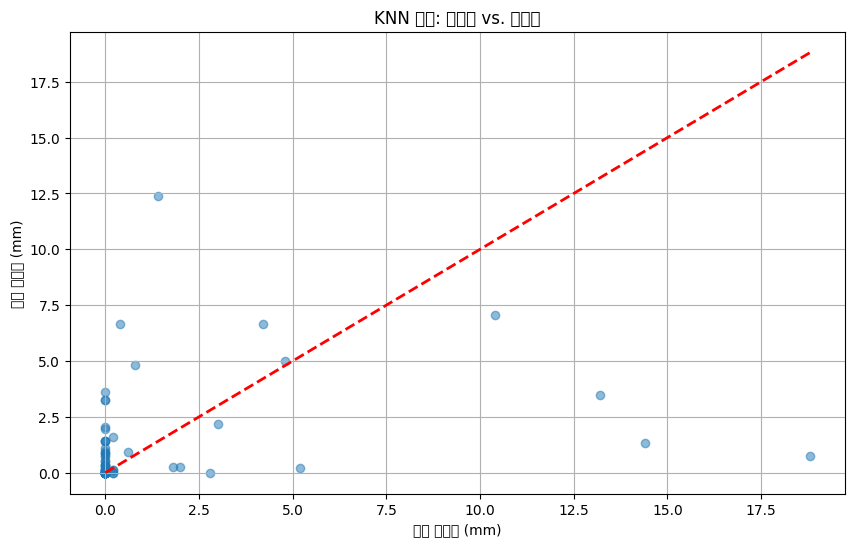

In [5]:
# 모델의 성능을 평균 제곱 오차(MSE)로 평가합니다.
knn_mse = mean_squared_error(y_test, knn_preds)
print(f"KNN 모델의 평균 제곱 오차 (MSE): {knn_mse:.2f}")

# 예측값과 실제값의 차이를 시각화합니다.
plt.figure(figsize=(10, 6))

# 실제값과 예측값을 산점도(scatter plot)로 표시
plt.scatter(y_test, knn_preds, alpha=0.5)

# 완벽한 예측을 나타내는 기준선(y=x)을 빨간 점선으로 추가합니다.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.title('KNN 모델: 실제값 vs. 예측값')
plt.xlabel('실제 강수량 (mm)')
plt.ylabel('예측 강수량 (mm)')
plt.grid(True)
plt.show()